### Assignment Task:
Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.

Dataset Description:

The dataset consists of the following variables:
Age: Age in years
KM: Accumulated Kilometers on odometer
FuelType: Fuel Type (Petrol, Diesel, CNG)
HP: Horse Power
Automatic: Automatic ( (Yes=1, No=0)
CC: Cylinder Volume in cubic centimeters
Doors: Number of doors
Weight: Weight in Kilograms
Quarterly_Tax: 
Price: Offer Price in EUROs

Taskes:

1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.
2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).
3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.
4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.
5.Apply Lasso and Ridge methods on the model.


#### 1. Load the Dataset and Perform EDA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r'C:\Users\Dell\Desktop\ToyotaCorolla - MLR.csv')
# Display the first few rows
print(df.head())
print(df.describe())
# Continuous variables
continuous_vars = ['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Weight']


   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170  
              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.

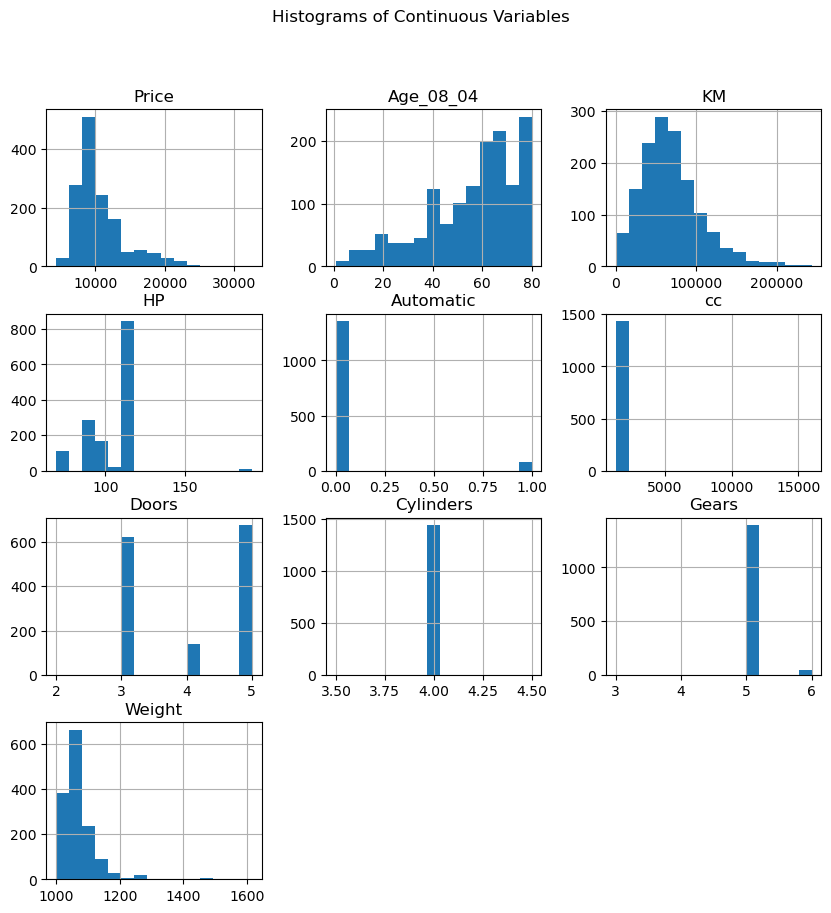

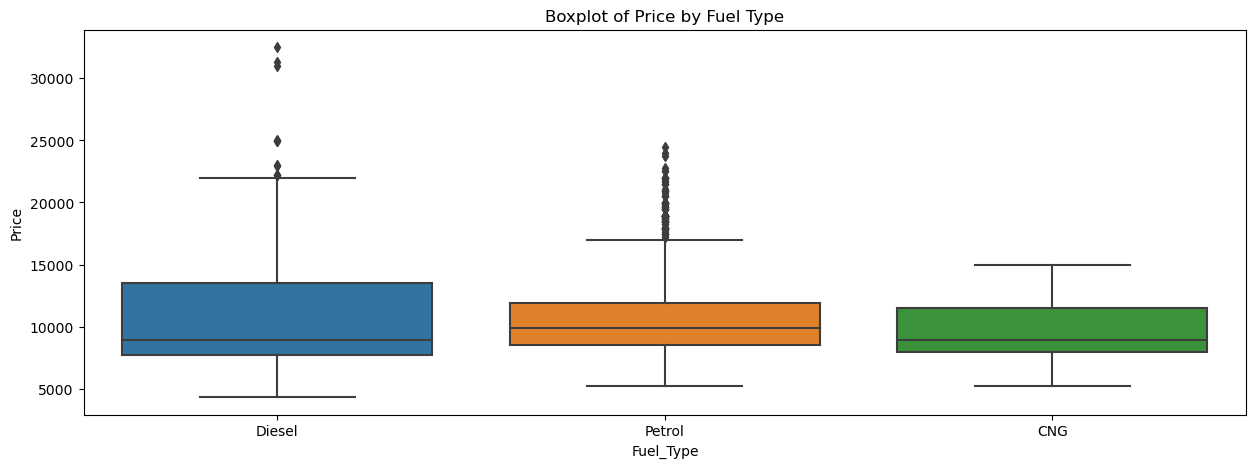

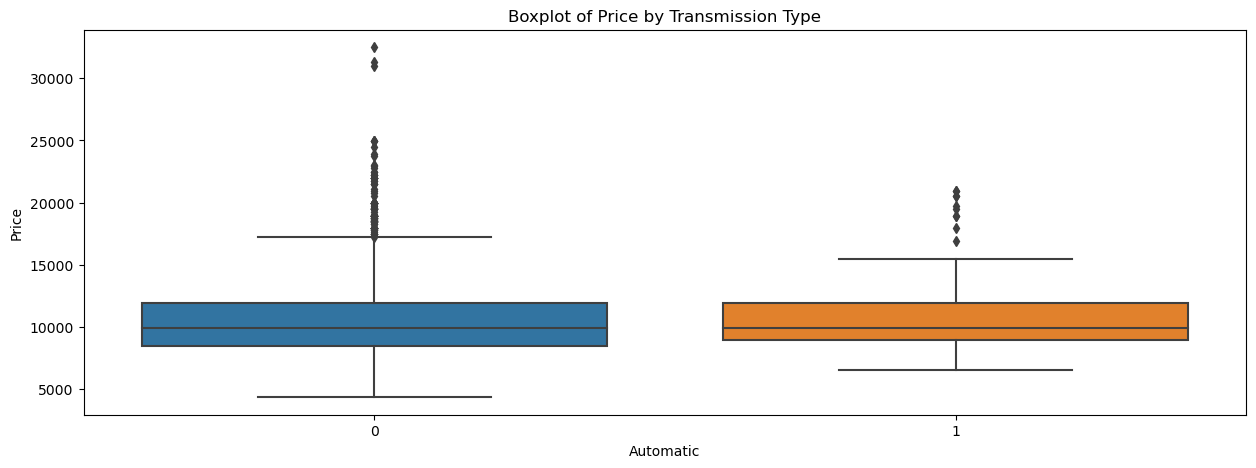

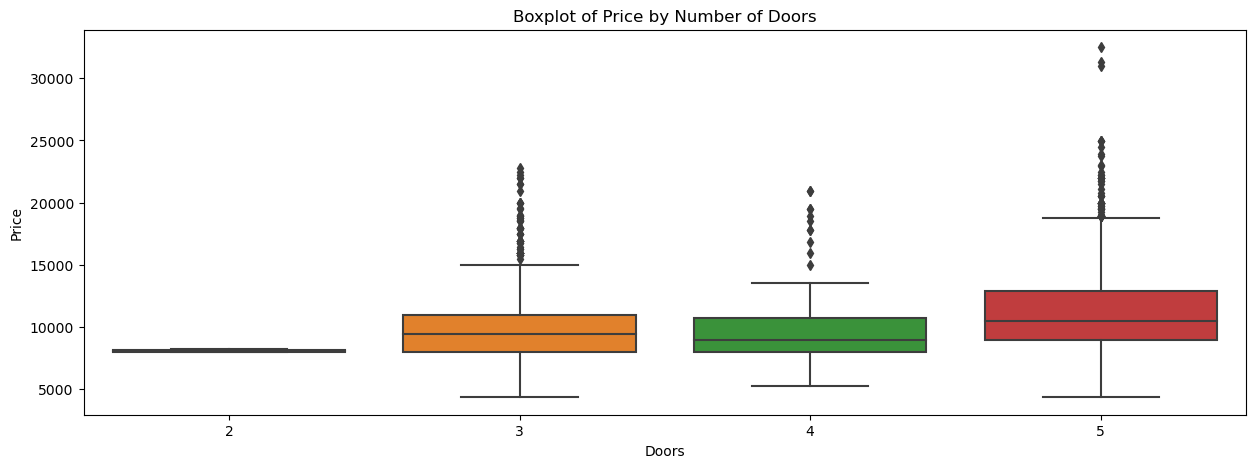

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


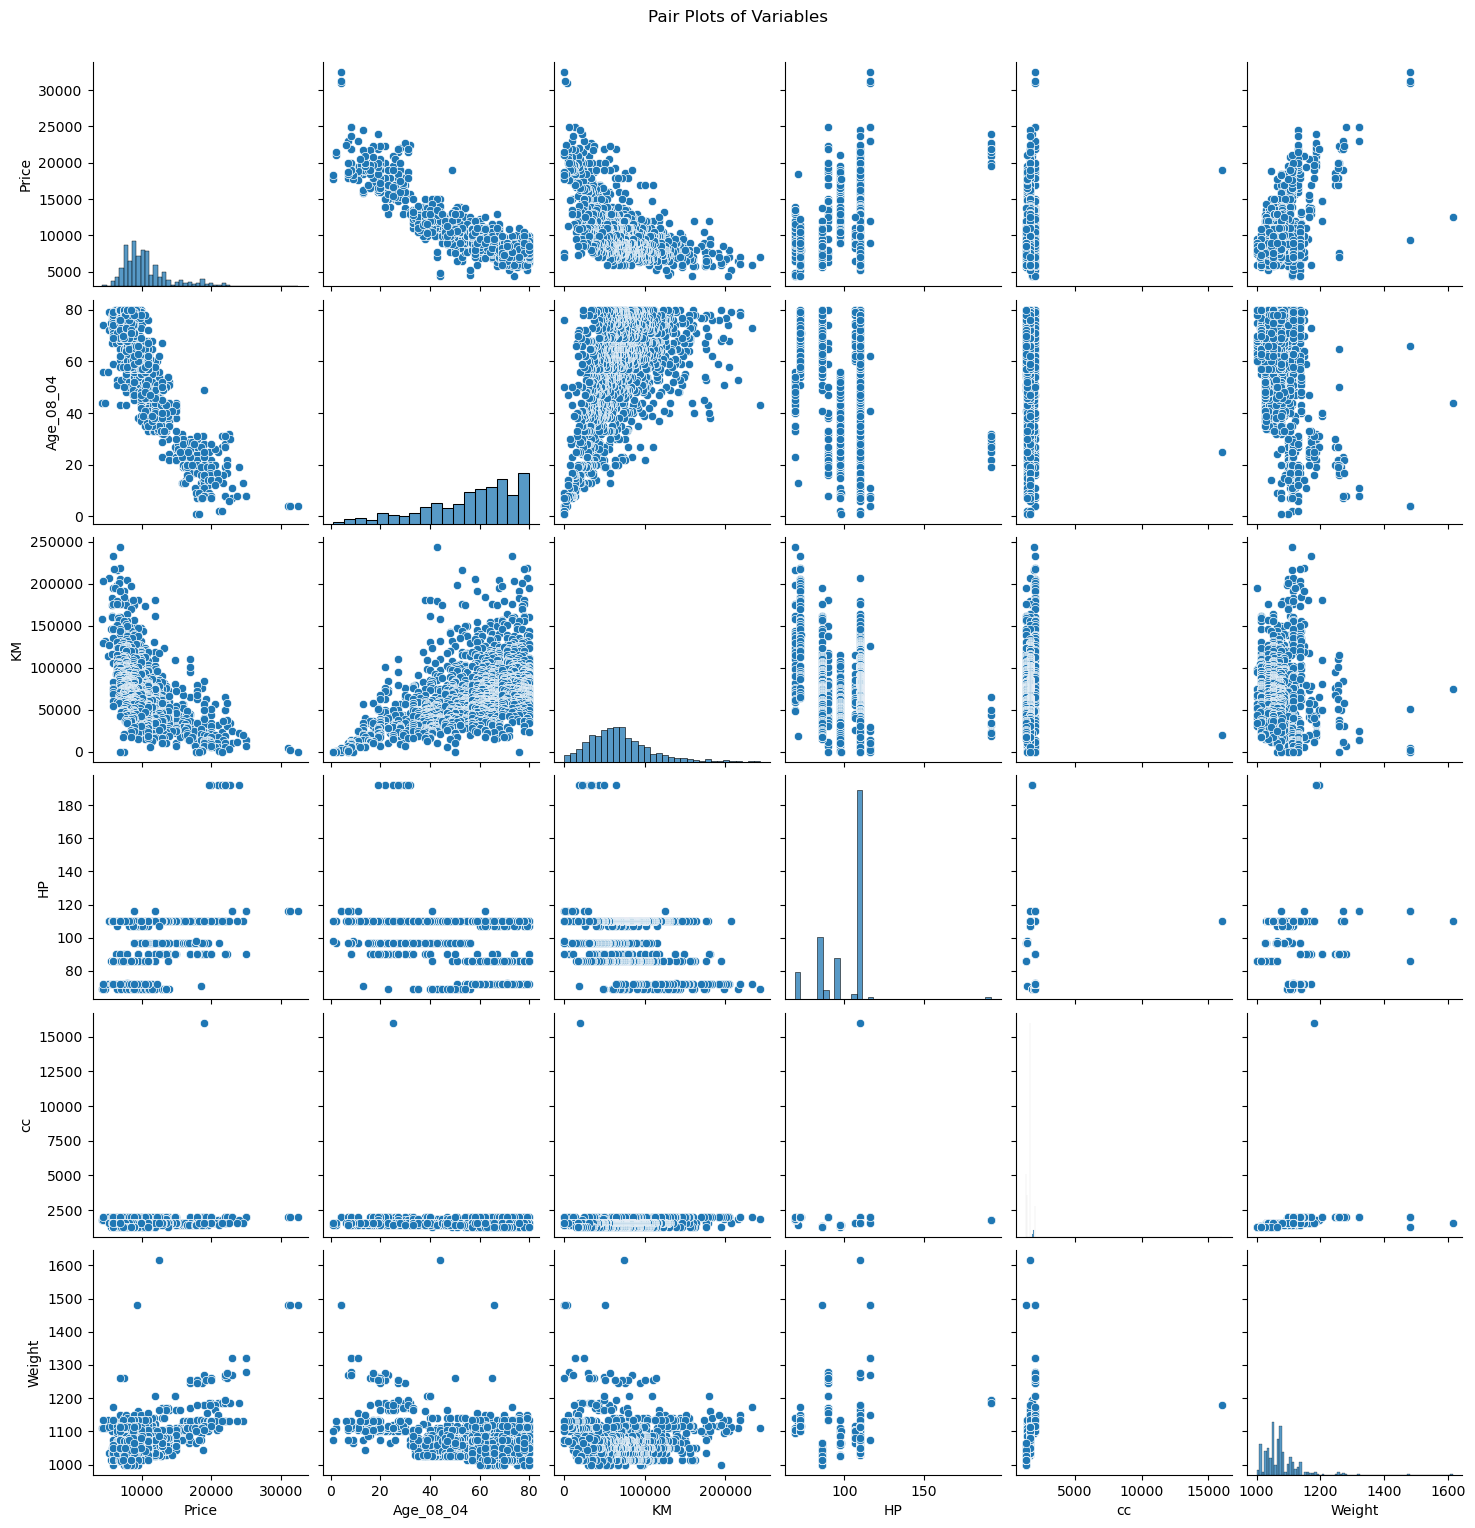

In [2]:
# Histograms
df.hist(bins=15, figsize=(10,10))
plt.suptitle('Histograms of Continuous Variables')
plt.show()

# Boxplots for categorical variables
plt.figure(figsize=(15, 5))
sns.boxplot(x='Fuel_Type', y='Price', data=df)
plt.title('Boxplot of Price by Fuel Type')
plt.show()

plt.figure(figsize=(15, 5))
sns.boxplot(x='Automatic', y='Price', data=df)
plt.title('Boxplot of Price by Transmission Type')
plt.show()

plt.figure(figsize=(15, 5))
sns.boxplot(x='Doors', y='Price', data=df)
plt.title('Boxplot of Price by Number of Doors')
plt.show()

# Pair plots
sns.pairplot(df[['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Weight']])
plt.suptitle('Pair Plots of Variables', y=1.02)
plt.show()

#### 2. Preprocess the Data

In [3]:
# Convert categorical variables into dummy/indicator variables
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

# Check for missing values
print(df.isnull().sum())

# Handle missing values if necessary (e.g., df.fillna(method='ffill', inplace=True))

# Define feature matrix X and target variable y
X = df.drop('Price', axis=1)
y = df['Price']


Price               0
Age_08_04           0
KM                  0
HP                  0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Weight              0
Fuel_Type_Diesel    0
Fuel_Type_Petrol    0
dtype: int64


### 3. Split the Dataset

In [4]:
from sklearn.model_selection import train_test_split

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 4. Build Multiple Linear Regression Models

In [5]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Print coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Predict on test set
y_pred = model.predict(X_test)


Coefficients: [-1.20830458e+02 -1.62314106e-02  1.40394788e+01  1.48830927e+02
 -3.03721946e-02 -6.03109744e+01  3.69482223e-13  5.51600710e+02
  2.58849583e+01 -6.85487568e+01  1.37080891e+03]
Intercept: -14255.38599356528


### 5. Evaluate Model Performance

In [6]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 2203043.8231437034
R-squared: 0.8348888040611082


### 6. Apply Lasso and Ridge Regression

In [7]:
from sklearn.linear_model import Lasso, Ridge

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
print("Lasso Mean Squared Error:", mean_squared_error(y_test, lasso_pred))
print("Lasso R-squared:", r2_score(y_test, lasso_pred))

# Ridge Regression
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
print("Ridge Mean Squared Error:", mean_squared_error(y_test, ridge_pred))
print("Ridge R-squared:", r2_score(y_test, ridge_pred))


Lasso Mean Squared Error: 2202270.260024681
Lasso R-squared: 0.8349467801805
Ridge Mean Squared Error: 2199746.370233347
Ridge R-squared: 0.8351359377712331
